In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls1 = pd.ExcelFile('Organic_Page_Views.xlsx')
xls2 = pd.ExcelFile('Paid_Page_Views.xlsx')
Organic = pd.read_excel(xls1, 'Dataset1')
Paid = pd.read_excel(xls2, 'Dataset1')

In [3]:
#Remove the dates for ease
Organic = Organic['Page Views']
Paid = Paid['Page Views']

In [4]:
#convert datasets into arrays
Organic = Organic.values
Paid = Paid.values

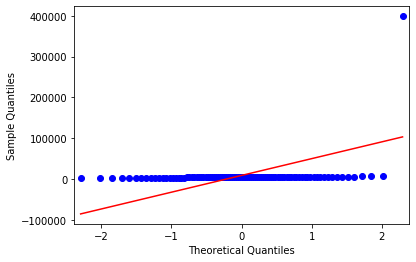

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Organic, line='s')
pyplot.show()

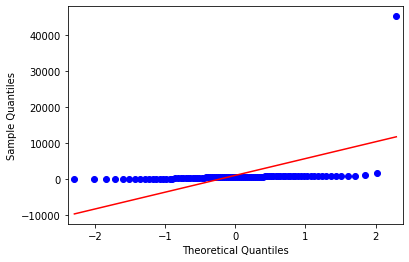

In [6]:
qqplot(Paid, line='s')
pyplot.show()

### Both datasets look not normal since they fall off the qq plot

In [7]:
# normality test with Shapiro
stat, p = shapiro(Organic)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.093, p=0.000
Sample does not look Gaussian (reject H0)


In [8]:
stat, p = shapiro(Paid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.116, p=0.000
Sample does not look Gaussian (reject H0)


### Since both datasets are not normaly distributed non-parametric tests should be used.

In [9]:
#import Spearman rank correlation:
#A non-parametric test that is used to measure the degree of association between two variables.
from scipy.stats import stats

In [10]:
stat, p = stats.spearmanr(Paid,Organic)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The correlation observed is not significant (fail to reject H0)')
else:
	print('The correlation observed is significant (reject H0)')
    
if stat > 0:
	print('The two datasets are positively corelated (as Paid Page Views Increase, Organice Page Views Increase)')
elif stat < 0:
	print('The two datasets are negatively corelated (as Paid Page Views Increase, Organice Page Views Decrease)')
else:
    print('The two datasets are not corelated')

Statistics=0.298, p=0.004
The correlation observed is significant (reject H0)
The two datasets are positively corelated (as Paid Page Views Increase, Organice Page Views Increase)


## We conclude that the two datasets are Positively corelated and that correlation is significant